Support Vector Classifier

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import download_data as dl
import matplotlib.pyplot as plt
import sklearn.svm as svm
from sklearn import metrics
from conf_matrix import func_confusion_matrix
from sklearn.cross_validation import cross_val_score

%matplotlib inline


/Users/tylerkistler/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:

## step 1: load data from csv file. 
data = dl.download_data('crab.csv').values

n = 200
#split data 
S = np.random.permutation(n)
#100 training samples
Xtr = data[S[:100], :6]
Ytr = data[S[:100], 6:]
# 100 testing samples
X_test = data[S[100:], :6]
Y_test = data[S[100:], 6:].ravel()


In [3]:
## step 2 randomly split Xtr/Ytr into two even subsets: use one for training, another for validation.

n2 = len(Xtr)
S2 = np.random.permutation(n2)

x_train = Xtr[S2[:50], :6]
y_train = Ytr[S2[:50], :6]

x_validation = Xtr[S2[:50], :6]
y_validation = Ytr[S2[:50], :6].ravel()


/Users/tylerkistler/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tylerkistler/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tylerkistler/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tylerkistler/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was e

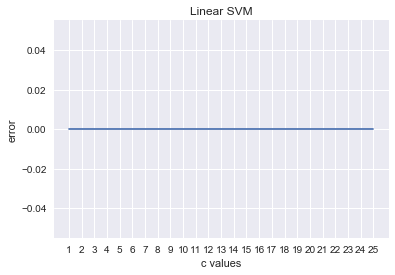

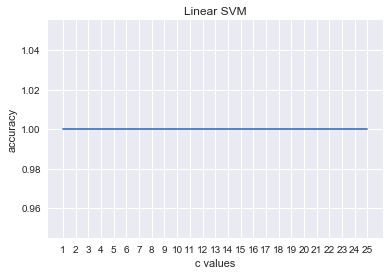

Confusion Matrix: 
[[43  5]
 [ 3 49]]
Average Accuracy: 0.92
Per-Class Precision: [ 0.93478261  0.90740741]
Per-Class Recall: [ 0.89583333  0.94230769]


In [4]:
## step 3 Model selection over validation set
# consider the parameters C, kernel types (linear, RBF etc.) and kernal
# parameters if applicable. 


# 3.1 Plot the validation errors while using different values of C ( with other hyperparameters fixed) 
#  keeping kernel = "linear"

c_range =  list(range(1,26))
svm_c_error = []
acc_score = []
for c_value in c_range:
    model = svm.SVC(kernel='linear', C=c_value)
    model.fit(X=x_train, y=y_train)
    error = 1. - model.score(x_validation, y_validation)
    svm_c_error.append(error)
    scores = cross_val_score(model, x_validation, y_validation, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
plt.plot(c_range, svm_c_error)
plt.title('Linear SVM')
plt.xlabel('c values')
plt.ylabel('error')
plt.xticks(c_range)
plt.show()

plt.plot(c_range, acc_score)
plt.title('Linear SVM')
plt.xlabel('c values')
plt.ylabel('accuracy')
plt.xticks(c_range)
plt.show()

y_pred=model.predict(X_test)

conf_matrix, accuracy, recall_array, precision_array = func_confusion_matrix(Y_test, y_pred)
print("Confusion Matrix: ")
print(conf_matrix)
print("Average Accuracy: {}".format(accuracy))
print("Per-Class Precision: {}".format(precision_array))
print("Per-Class Recall: {}".format(recall_array))

/Users/tylerkistler/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tylerkistler/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tylerkistler/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tylerkistler/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was e

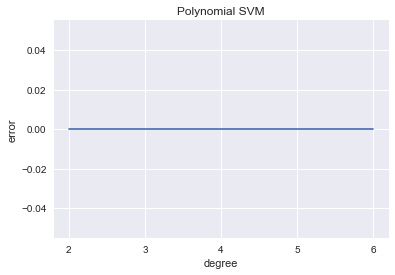

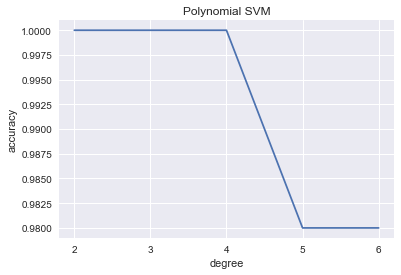

Confusion Matrix: 
[[41  7]
 [ 6 46]]
Average Accuracy: 0.87
Per-Class Precision: [ 0.87234043  0.86792453]
Per-Class Recall: [ 0.85416667  0.88461538]


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

degree=[2,3,4,5,6]
svm_d_error = []
acc_score2 = []
for d in degree:
    model2 = svm.SVC(kernel='poly', degree=d)
    model2.fit(X=x_train, y=y_train)
    error = 1. - model2.score(x_validation, y_validation)
    svm_d_error.append(error)
    scores = cross_val_score(model2, x_validation, y_validation, cv=10, scoring='accuracy')
    acc_score2.append(scores.mean())
plt.plot(degree, svm_d_error)
plt.title('Polynomial SVM')
plt.xlabel('degree')
plt.ylabel('error')
plt.xticks(degree)
plt.show()

plt.plot(degree, acc_score2)
plt.title('Polynomial SVM')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.xticks(degree)
plt.show()

y_pred=model2.predict(X_test)

conf_matrix, accuracy, recall_array, precision_array = func_confusion_matrix(Y_test, y_pred)
print("Confusion Matrix: ")
print(conf_matrix)
print("Average Accuracy: {}".format(accuracy))
print("Per-Class Precision: {}".format(precision_array))
print("Per-Class Recall: {}".format(recall_array))

/Users/tylerkistler/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tylerkistler/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tylerkistler/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tylerkistler/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was e

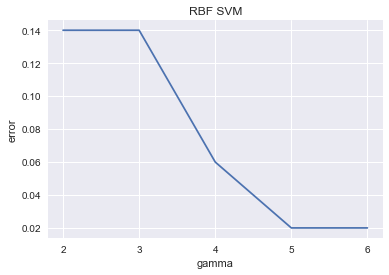

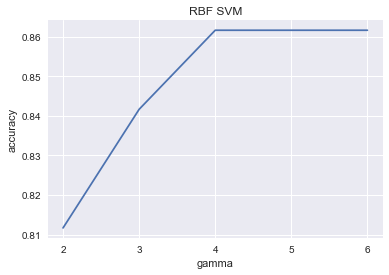

Confusion Matrix: 
[[39  9]
 [13 39]]
Average Accuracy: 0.78
Per-Class Precision: [ 0.75    0.8125]
Per-Class Recall: [ 0.8125  0.75  ]


In [6]:
gamma_range=[0.01,0.02,0.03,0.04,0.05]
acc_score3=[]
svm_g_error = []
for g in gamma_range:
    model3 = svm.SVC(kernel='rbf', gamma=g)
    model3.fit(X=x_train, y=y_train)
    error = 1. - model3.score(x_validation, y_validation)
    svm_g_error.append(error)
    scores = cross_val_score(model3, x_validation, y_validation, cv=10, scoring='accuracy')
    acc_score3.append(scores.mean())
    
plt.plot(degree, svm_g_error)
plt.title('RBF SVM')
plt.xlabel('gamma')
plt.ylabel('error')
plt.xticks(degree)
plt.show()

plt.plot(degree, acc_score3)
plt.title('RBF SVM')
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.xticks(degree)
plt.show()

y_pred=model3.predict(X_test)

conf_matrix, accuracy, recall_array, precision_array = func_confusion_matrix(Y_test, y_pred)
print("Confusion Matrix: ")
print(conf_matrix)
print("Average Accuracy: {}".format(accuracy))
print("Per-Class Precision: {}".format(precision_array))
print("Per-Class Recall: {}".format(recall_array))

In [7]:
## step 4 Select the best model and apply it over the testing subset 
best_kernel_poly = 'poly'
best_d = 2 
best_model_poly = svm.SVC(kernel=best_kernel_poly, degree=best_d)
best_model_poly.fit(X=x_train, y=y_train)

/Users/tylerkistler/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
## step 5 evaluate your results with the metrics you have developed in HA3,including accuracy, quantize your results. 
y_pred=best_model_poly.predict(X_test)

conf_matrix, accuracy, recall_array, precision_array = func_confusion_matrix(Y_test, y_pred)
print("Confusion Matrix: ")
print(conf_matrix)
print("Average Accuracy: {}".format(accuracy))
print("Per-Class Precision: {}".format(precision_array))
print("Per-Class Recall: {}".format(recall_array))

Confusion Matrix: 
[[43  5]
 [ 5 47]]
Average Accuracy: 0.9
Per-Class Precision: [ 0.89583333  0.90384615]
Per-Class Recall: [ 0.89583333  0.90384615]


In [9]:
## step 4 Select the best model and apply it over the testing subset 

best_kernel_linear = 'linear'
best_c = 5 
best_model_linear = svm.SVC(kernel=best_kernel_linear, C=best_c)
best_model_linear.fit(X=x_train, y=y_train)

/Users/tylerkistler/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
## step 5 evaluate your results with the metrics you have developed in HA3,including accuracy, quantize your results. 

y_pred=best_model_linear.predict(X_test)

conf_matrix, accuracy, recall_array, precision_array = func_confusion_matrix(Y_test, y_pred)
print("Confusion Matrix: ")
print(conf_matrix)
print("Average Accuracy: {}".format(accuracy))
print("Per-Class Precision: {}".format(precision_array))
print("Per-Class Recall: {}".format(recall_array))

Confusion Matrix: 
[[43  5]
 [ 3 49]]
Average Accuracy: 0.92
Per-Class Precision: [ 0.93478261  0.90740741]
Per-Class Recall: [ 0.89583333  0.94230769]


In [11]:
## step 6 Show 5 correct and 5 incorrect predictions by the best model

df = pd.DataFrame(X_test)
df["actual"] = Y_test
df["predicted"] = y_pred

correct = df[df["actual"] == df["predicted"]]
incorrect = df[df["actual"] != df["predicted"]]


In [12]:
# 5 correct prediction samples
correct.head(n=5)

,0,1,2,3,4,5,actual,predicted
0,0.0,21.6,15.4,45.7,49.7,20.6,-1.0,-1.0
3,0.0,12.5,9.4,24.2,27.0,11.2,-1.0,-1.0
5,0.0,10.2,8.2,20.2,22.2,9.0,-1.0,-1.0
6,0.0,20.6,14.4,42.8,46.5,19.6,-1.0,-1.0
7,1.0,14.6,11.3,31.9,36.4,13.7,-1.0,-1.0


In [13]:
# 5 incorrect prediction samples
incorrect.head(n=5)

,0,1,2,3,4,5,actual,predicted
1,1.0,11.1,9.9,23.8,27.1,9.8,-1.0,1.0
2,1.0,9.1,8.2,19.2,22.2,7.7,1.0,-1.0
4,1.0,12.3,11.0,26.8,31.5,11.4,-1.0,1.0
36,1.0,7.2,6.5,14.7,17.1,6.1,1.0,-1.0
59,1.0,9.5,8.2,19.6,22.4,7.8,1.0,-1.0


In [17]:
# function for building weak classifiers, i.e.:  stump function

import numpy as py

def buildWeakStump(d,l,D): # (data, label, weight)
    dataMatrix = py.mat(d)
    labelmatrix = py.mat(l).T
    m,n = py.shape(dataMatrix)
    numstep = 10.0
    bestStump = {}
    bestClass = py.mat(py.zeros((5,1)))
    minErr = py.inf
    for i in range(n):
        datamin = dataMatrix[:,i].min()
        datamax = dataMatrix[:,i].max()
        stepSize = (datamax - datamin) / numstep
        for j in range(-1,int(numstep)+1):
            for inequal in ['lt','gt']:
                threshold = datamin + float(j) * stepSize
                predict = stumpClassify(dataMatrix,i,threshold,inequal)
                err = py.mat(py.ones((m,1)))
                err[predict == labelmatrix] = 0
                weighted_err = D.T * err;
                if weighted_err < minErr:
                    minErr = weighted_err
                    bestClass = predict.copy()
                    bestStump['dim'] = i
                    bestStump['threshold'] = threshold
                    bestStump['ineq'] = inequal
    return bestStump, minErr, bestClass

# Use a weak classifier, i.e. a decision stump, to classify data

def stumpClassify(datamat,dim,threshold,inequal):
    res = py.ones((py.shape(datamat)[0],1))
    if inequal == 'lt':
        res[datamat[:,dim] <= threshold] = -1.0
    else:
        res[datamat[:,dim] > threshold] = -1.0
    return res

# Boosting Algorithm

def train(data,label,numIt = 1000):
    
    weakClassifiers = []
    #m is the number of samples
    m = py.shape(data)[0]
    # sample weights, 1/m at the beginning
    D = py.mat(py.ones((m,1))/m) 
    
    estStrong = py.mat(py.zeros((m,1)))
    for i in range(numIt):
        # bestStump: weak classifier; error: error rate
        bestStump, error, classEstimate = buildWeakStump(data,label,D)
        print("D:",D.T)
        
        # calculate the weight of the selected decision stump based on its error rate
        alpha = float(0.5*py.log((1.0-error)/max(error,1e-16)))
        
        # add one more field to bestStump, i.e. classifier weight
        bestStump['alpha'] = alpha
        # add bestStump to the list of weak classifiers
        weakClassifiers.append(bestStump)
        print("classEstimate: ",classEstimate.T)

        #calculate sample weights (of all samples) 
        # set sample weights
        expon = py.multiply(-1*alpha*py.mat(label).T,classEstimate)
        D = py.multiply(D,py.exp(expon))
        # normalize D
        D = D/D.sum()
        
        
        estStrong += classEstimate*alpha
        
        EnsembleErrors = py.multiply(py.sign(estStrong)!=py.mat(label).T,\
                                  py.ones((m,1)))  #Converte to float
        
        errorRate = EnsembleErrors.sum()/m
        
        print("current error:  ",errorRate)
        if errorRate == 0.0:
            break
    return weakClassifiers

# Applying an adaboost classifier for a single data sample

def adaboostClassify(dataTest,classifier):
    dataMatrix = py.mat(dataTest)
    m = py.shape(dataMatrix)[0]
    estStrong = py.mat(py.zeros((m,1)))
    for i in range(len(classifier)):
        # call the function stumpClassify()
        classEstimate = stumpClassify(dataMatrix, 
                                      classifier[i]['dim'], 
                                      classifier[i]['threshold'], 
                                      classifier[i]['ineq'])
        # accumulate all predictions
        estStrong += classifier[i]['alpha']*classEstimate
    return py.sign(estStrong)

# Applying an adaboost classifier for all testing samples
def test(dataSet,classifier):
    label = []
    for i in range(py.shape(dataSet)[0]):
        label.append(adaboostClassify(dataSet[i,:],classifier))
    return label




In [19]:
#training
classifier = train(df.values[:, :6],df.values[:, 6],150)
print('done training\n')
#testing
test(X_test,classifier)
print('done teting\n')

D: [[ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
   0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
   0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
   0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
   0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
   0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
   0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
   0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
   0.01  0.01  0.01  0.01]]
classEstimate:  [[ 1. -1. -1. -1. -1. -1.  1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1. -1.
  -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  -1. -1.  1.  1.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1. -1. -1. -1.  1.
   1. -1. -1.  1.  1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1.  1.  1.  1.
  -1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1. -1. -1.  1.  1.

classEstimate:  [[ 1. -1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1.  1.  1. -1.  1.  1. -1.
  -1. -1.  1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  -1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1. -1.  1.
  -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1.
  -1. -1. -1. -1. -1.  1. -1. -1.  1. -1. -1.  1. -1. -1.  1.  1. -1. -1.
  -1. -1. -1. -1. -1. -1.  1.  1. -1.  1.]]
current error:   0.14
D: [[ 0.01018753  0.01390096  0.01931087  0.00732827  0.00689993  0.01390096
   0.00630224  0.00689993  0.01403328  0.00645669  0.00969531  0.00630224
   0.00603859  0.01018753  0.00457045  0.01018753  0.00903604  0.01931087
   0.00158951  0.00645669  0.00903604  0.00732827  0.01828016  0.00957758
   0.00577069  0.00903604  0.00265509  0.00603859  0.00630224  0.0115255
   0.01018753  0.00265509  0.01931087  0.00265509  0.00712994  0.01390096
   0.01931087  0.00303381  0.01403328  0.00265509  0.00577069  0.00303381
   0.00689993  0.00577069  0

classEstimate:  [[-1.  1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
   1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1.
  -1. -1.  1. -1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1. -1. -1.
   1. -1.  1. -1. -1. -1. -1. -1. -1. -1.]]
current error:   0.1
D: [[ 0.00633743  0.0265409   0.01689651  0.00727912  0.0069858   0.0265409
   0.00287404  0.00508283  0.00955664  0.00782739  0.00914334  0.00287404
   0.00522092  0.00896622  0.00328063  0.00896622  0.00421504  0.01689651
   0.00117091  0.00569516  0.00583712  0.00727912  0.02519063  0.00644174
   0.00388129  0.00583712  0.00229557  0.00522092  0.00398007  0.00996486
   0.00633743  0.00229557  0.02363759  0.00229557  0.00654434  0.01897184
   0.02363759  0.00307156  0.00955664  0.00229557  0.00388129  0.00223485
   0.0069858   0.00388129  0.

current error:   0.09
D: [[ 0.0040719   0.03074187  0.01976527  0.00843128  0.00809154  0.03074187
   0.00141096  0.00425939  0.01067536  0.009667    0.00770475  0.00141096
   0.00368941  0.00576094  0.00379989  0.00755822  0.00172207  0.01976527
   0.00098122  0.00508871  0.00409337  0.00843128  0.02763659  0.00706722
   0.00425815  0.00409337  0.00162218  0.00368941  0.00335385  0.00704176
   0.00534224  0.00162218  0.03481089  0.00162218  0.00269332  0.01745492
   0.03481089  0.00355774  0.01067536  0.00162218  0.00425815  0.0018728
   0.00809154  0.00425815  0.00368941  0.00324137  0.00379989  0.03074187
   0.00940363  0.00162218  0.00425939  0.00379989  0.01745492  0.00409337
   0.00425815  0.01795368  0.00928203  0.00704176  0.00508871  0.01976527
   0.01976527  0.00508871  0.00928203  0.00928203  0.03384383  0.00409337
   0.00229343  0.00425815  0.01976527  0.01442755  0.00162218  0.02394531
   0.00843128  0.00508871  0.00508871  0.01447971  0.00508871  0.0040719
   0.00809154  

classEstimate:  [[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.
  -1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]
current error:   0.07
D: [[ 0.00331833  0.03185274  0.02448203  0.00537357  0.00697203  0.0315575
   0.00114984  0.00367008  0.01125963  0.01182465  0.00623651  0.00114984
   0.00447787  0.00469478  0.00187455  0.00615944  0.00219616  0.02425511
   0.00051792  0.00482032  0.00518508  0.00537357  0.02272503  0.00581124
   0.00350139  0.00518508  0.00120611  0.00346771  0.00342597  0.00854665
   0.00435357  0.00155745  0.03494283  0.00120611  0.0032689   0.02211017
   0.03494283  0.00242494  0.00892211  0.00155745  0.00350139  0.00098853
   0.00697203  0.00350139  0

   0.00830038  0.01377607  0.00597698  0.00302286]]
classEstimate:  [[-1.  1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.
  -1.  1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1.  1. -1. -1.
   1. -1. -1.  1. -1. -1.  1. -1. -1. -1.  1.  1. -1.  1.  1.  1.  1. -1.
  -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1. -1.  1. -1.
   1.  1.  1. -1.  1. -1.  1.  1. -1.  1.  1. -1.  1.  1. -1. -1.  1.  1.
   1.  1.  1.  1.  1. -1. -1. -1.  1. -1.]]
current error:   0.07
D: [[ 0.00253308  0.03998649  0.02284967  0.00674574  0.00694462  0.03961586
   0.00111297  0.00288134  0.01089867  0.0113541   0.00745122  0.00111297
   0.00439121  0.00442201  0.00186718  0.00736734  0.00174284  0.02263788
   0.00032342  0.00364813  0.00507907  0.00674574  0.02205569  0.00564008
   0.00339826  0.00507907  0.00094076  0.0034006   0.00409326  0.00838126
   0.00422028  0.00121481  0.02667403  0.00094076  0.00259415  0.02703012
   0.03348891  0.0019212   0.00863609  0.00121481

D: [[ 0.0020997   0.03879557  0.02770701  0.00533477  0.00691734  0.03030609
   0.00113046  0.00287002  0.01334898  0.01056881  0.00755132  0.00138688
   0.00405904  0.00366544  0.00121151  0.0074831   0.00161482  0.02655338
   0.00032215  0.00339582  0.00469545  0.00533477  0.0219795   0.00557913
   0.00336154  0.00469545  0.00070882  0.00256219  0.00510061  0.00631488
   0.00525889  0.00112292  0.02679693  0.00070882  0.00241573  0.02536829
   0.04060792  0.00155984  0.00860268  0.00112292  0.00274004  0.00050119
   0.00563841  0.00274004  0.00405904  0.00259699  0.00148631  0.03718025
   0.00711813  0.00112292  0.00287002  0.00121151  0.01686852  0.0030985
   0.00274004  0.02482826  0.00570544  0.00631488  0.00339582  0.02770701
   0.02655338  0.00416607  0.00570544  0.00570544  0.04149117  0.00593894
   0.00077118  0.00336154  0.02276136  0.01264277  0.0009153   0.02098312
   0.00533477  0.00339582  0.00416607  0.01412784  0.00339582  0.0020997
   0.00691734  0.02597816  0.01078678

current error:   0.05
D: [[ 0.0016808   0.04616177  0.02662034  0.0063477   0.00692594  0.03606037
   0.00073757  0.00191091  0.01260712  0.01253323  0.00510878  0.00090487
   0.00397494  0.00353474  0.00099338  0.00721627  0.00153817  0.02551195
   0.00017993  0.00326999  0.00463772  0.0063477   0.02118875  0.00451185
   0.00271848  0.00463772  0.00069414  0.00250911  0.0041057   0.00737179
   0.00420972  0.00109965  0.02574595  0.00069414  0.00190797  0.03018502
   0.03901528  0.001279    0.00682859  0.00109965  0.00221587  0.0003337
   0.00462324  0.00221587  0.00397494  0.0016944   0.00148816  0.04423975
   0.00703062  0.00109965  0.00191091  0.00099338  0.02007139  0.00306041
   0.00221587  0.02419339  0.00548168  0.00737179  0.00326999  0.02662034
   0.02551195  0.0040117   0.00548168  0.00548168  0.03986388  0.00697922
   0.00051174  0.00271848  0.02186866  0.01240451  0.00089634  0.02058768
   0.0063477   0.00326999  0.0040117   0.01142519  0.00267791  0.0016808
   0.00692594  

   0.00639527  0.01061419  0.00559938  0.00193065]]
classEstimate:  [[-1.  1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1.
  -1.  1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1.  1. -1. -1.
   1. -1. -1.  1. -1. -1.  1. -1. -1. -1.  1.  1. -1.  1.  1.  1.  1. -1.
  -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1. -1.  1. -1.
   1.  1.  1. -1.  1. -1.  1.  1. -1.  1.  1. -1.  1.  1. -1. -1.  1.  1.
   1.  1.  1.  1.  1. -1. -1. -1.  1. -1.]]
current error:   0.05
D: [[ 0.00132812  0.04452108  0.02574905  0.00612209  0.00817748  0.04313294
   0.00070839  0.00188134  0.01210834  0.01054336  0.00589219  0.00086907
   0.0033257   0.00339489  0.00079889  0.00693077  0.00129327  0.02494048
   0.00014928  0.00275082  0.00468255  0.00612209  0.02455693  0.00436123
   0.00262774  0.00468255  0.00048939  0.00209929  0.00473529  0.00616773
   0.00332641  0.00077529  0.02427233  0.00048939  0.00191398  0.03142873
   0.04335366  0.0010611   0.00655843  0.00077529

classEstimate:  [[ 1. -1. -1. -1. -1. -1.  1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1. -1.
  -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  -1. -1.  1.  1.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1. -1. -1. -1.  1.
   1. -1. -1.  1.  1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1.  1.  1.  1.
  -1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1. -1. -1.  1.  1. -1. -1.
  -1. -1. -1.  1. -1.  1.  1.  1. -1.  1.]]
current error:   0.04
D: [[ 0.00155997  0.03556959  0.03071013  0.00489117  0.00675344  0.04224076
   0.00083205  0.00131463  0.01422211  0.01254748  0.0069208   0.00102078
   0.0033071   0.00398754  0.00054416  0.00814068  0.00128604  0.02530759
   0.00010431  0.00276993  0.00465636  0.00489117  0.02410125  0.00428031
   0.00257898  0.00465636  0.00048665  0.00208755  0.00556194  0.00613323
   0.0039071   0.00077096  0.0285096   0.00048665  0.00190327  0.0312529
   0.04244741  0.00087632  0.00770335  0.00077096  0.00210216  0.00019345
   0.00375905  0.00210216  0

done teting



/Users/tylerkistler/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tylerkistler/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


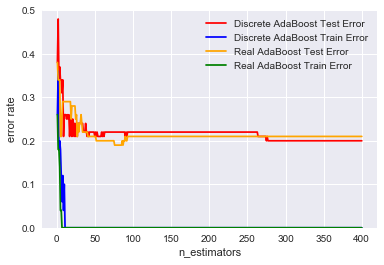

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import AdaBoostClassifier


n_estimators = 400
# A learning rate of 1. may not be optimal for both SAMME and SAMME.R
learning_rate = 1.

dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(x_train, y_train)
dt_stump_err = 1.0 - dt_stump.score(X_test, Y_test)

dt = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1)
dt.fit(x_train, y_train)
dt_err = 1.0 - dt.score(X_test, Y_test)


ada_discrete = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME")
ada_discrete.fit(x_train, y_train)

ada_real = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME.R")
ada_real.fit(x_train, y_train)

fig = plt.figure()
ax = fig.add_subplot(111)

ada_discrete_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_test)):
    ada_discrete_err[i] = zero_one_loss(y_pred, Y_test)

ada_discrete_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(x_validation)):
    ada_discrete_err_train[i] = zero_one_loss(y_pred, y_validation)

ada_real_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred, Y_test)

ada_real_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(x_validation)):
    ada_real_err_train[i] = zero_one_loss(y_pred, y_validation)

ax.plot(np.arange(n_estimators) + 1, ada_discrete_err,
        label='Discrete AdaBoost Test Error',
        color='red')
ax.plot(np.arange(n_estimators) + 1, ada_discrete_err_train,
        label='Discrete AdaBoost Train Error',
        color='blue')
ax.plot(np.arange(n_estimators) + 1, ada_real_err,
        label='Real AdaBoost Test Error',
        color='orange')
ax.plot(np.arange(n_estimators) + 1, ada_real_err_train,
        label='Real AdaBoost Train Error',
        color='green')

ax.set_ylim((0.0, 0.5))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()